In [1]:
 This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

import numpy as np 
import pandas as pd
bikes=pd.read_csv('train.csv')
bikes_test=pd.read_csv('test.csv')

SyntaxError: invalid syntax (<ipython-input-1-b39ee8cd1c49>, line 1)

In [65]:
data = pd.read_csv('health4.csv')
fat_percentage = data['%Bfat']
features = data.drop('%Bfat', axis = 1)
#data.head()
features.head()
#prices.head()


,RCC,BMI,SSF
0,3.96,20.56,109.1
1,4.41,20.67,102.8
2,4.14,21.86,104.6
3,4.11,21.88,126.4
4,4.45,18.96,80.3


In [66]:
data.head()

,RCC,BMI,SSF,%Bfat
0,3.96,20.56,109.1,19.75
1,4.41,20.67,102.8,21.30
2,4.14,21.86,104.6,19.88
3,4.11,21.88,126.4,23.66
4,4.45,18.96,80.3,17.64


In [67]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.63
Maximum price: $35.52
Mean price: $13.51
Median price $11.65
Standard deviation of prices: $6.17


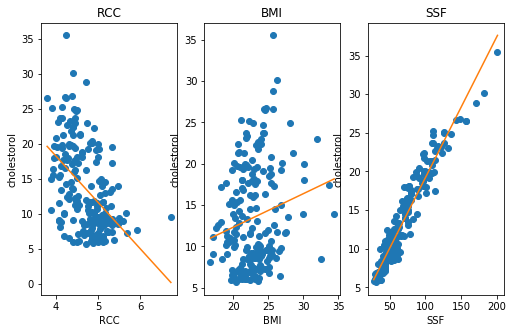

In [68]:
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 7, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('cholestorol')

In [69]:
# TODO: Import 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    from sklearn.metrics import r2_score
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score


In [70]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


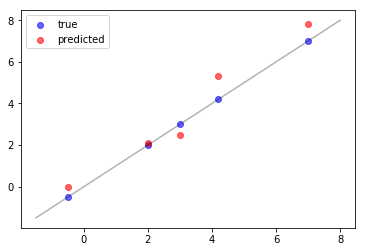

In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

true, pred = [3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]

#Plot true values
true_handle = plt.scatter(true, true, alpha=0.6, color='blue', label='true')

#Reference line
fit = np.poly1d(np.polyfit(true,true,1))
lims = np.linspace(min(true) - 1, max(true) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

#Plot predicted values
pred_handle = plt.scatter(true, pred, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.show()

In [72]:
# TODO: Import 'train_test_split'
from sklearn import cross_validation

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, prices, test_size = 0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


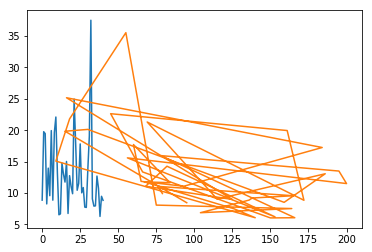

In [73]:
#Define the necessary functions for plotting
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import numpy as np
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split

#Training Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
pred = regressor.fit(X_train, y_train)
y_pred = pred.predict(X_test)

plt.plot(y_pred)
plt.plot(y_test)
plt.show()


NameError: name 'ModelLearning' is not defined

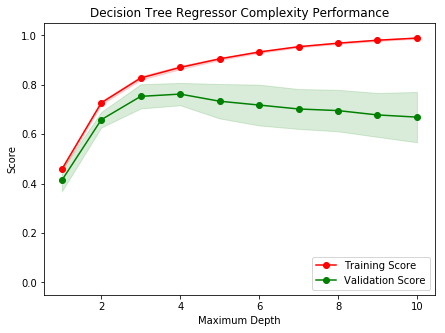

In [54]:
ModelComplexity(X_train, y_train)

In [55]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    
    regressor = DecisionTreeRegressor(random_state = 1001)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    tree_range = range(1, 11)
    params = dict(max_depth=[1,2,3,4,5,6,7,8,9,10])

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [56]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [57]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


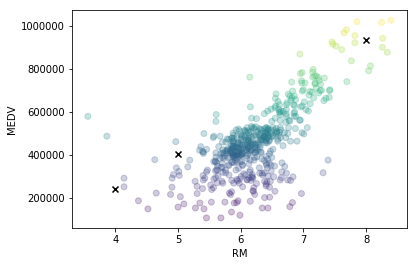

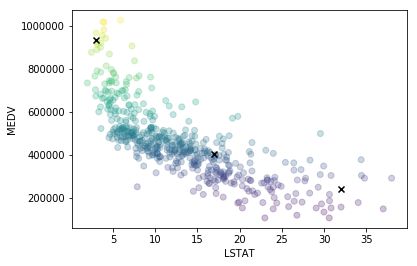

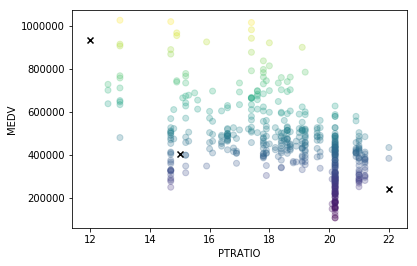

In [58]:
from matplotlib import pyplot as plt

clients = np.transpose(client_data)
pred = reg.predict(client_data)
for i, feat in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.scatter(features[feat], prices, alpha=0.25, c=prices)
    plt.scatter(clients[i], pred, color='black', marker='x', linewidths=2)
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()

In [59]:
reg = fit_model(X_train, y_train)
pred = reg.predict(X_test)
score = performance_metric(y_test,pred)
print("R Squared Value: " + str(score))

R Squared Value: 0.843999557536


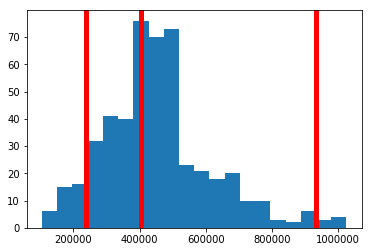

In [60]:
import matplotlib.pyplot as plt
plt.hist(prices, bins = 20)
for price in reg.predict(client_data):
    plt.axvline(price, lw = 5, c = 'r')

In [61]:
PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61
